In [1]:
from pkg.pkg import PKG
openke_dir = "temp2/openke"
pkg_dir = "temp2/sample_pkg_large"

In [2]:
# # load OpenKE format embeddings
embedding_dir = "temp2/embedding_TransE"
embeddings, genders, ages = PKG.load_embeddings(
    embedding_path = embedding_dir + "/embedding.vec.json",
    openke_dir = openke_dir,
    user_info_path = pkg_dir + "/user_id_imei_birth_gender.txt")

# Or, load OpenNE format embeddings
# embedding_dir = "temp/embedding_test"
# embeddings, genders, ages = PKG.load_embeddings(
#     embedding_path = embedding_dir + "/embedding.vec.txt",
#     openke_dir = openke_dir,
#     user_info_path = pkg_dir + "/user_id_imei_birth_gender.txt",
#     embedding_format = "openne")

print(len(genders))
print("Male portion: %s" % (sum([gender == 1 for gender in genders]) / len(genders)))

100000 users in total
Sample embeddings: [[-0.2944176495075226, -0.007726730313152075, 0.026990005746483803, -0.03795230761170387, 0.06020239368081093, 0.10205274075269699, 0.019535530358552933, 0.01576598547399044, -0.02947552129626274, 0.36496368050575256, 0.011428842321038246, 0.16630055010318756, -0.1609603613615036, -0.07323186099529266, -0.011009362526237965, 0.40671810507774353, -0.0031636846251785755, 0.2488667517900467, 0.22681863605976105, -0.19204936921596527, 0.026805639266967773, 0.4597313106060028, 0.17035900056362152, 0.1703597903251648, -0.29860660433769226, 0.008890237659215927, -0.1845225989818573, -0.003951612859964371, 0.011741908267140388, 0.4247229993343353, -0.09378622472286224, 0.036439601331949234, 0.11252289265394211, 0.27346789836883545, -0.004068618640303612, 0.05641251429915428, 0.0137751754373312, 0.18181006610393524, -0.014254729263484478, -0.22346347570419312, -0.22675853967666626, -0.10615231841802597, 0.07027361541986465, 0.3844936490058899, -0.0896696

In [3]:
# from sklearn.manifold import TSNE
from MulticoreTSNE import MulticoreTSNE as TSNE
import numpy as np
X_tsne = TSNE(n_jobs=4).fit_transform(np.array(embeddings))
print(X_tsne[:5])

[[-2.7238887  -5.36609119]
 [-7.55346483 -1.77497473]
 [-8.18249797  7.27061494]
 [ 0.46133341  1.39763505]
 [-2.62624456  6.84784806]]


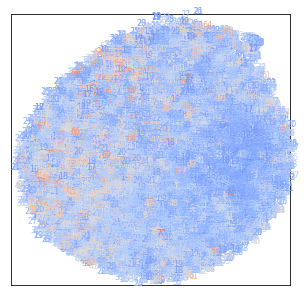

In [4]:
import numpy as np

targets = np.array(ages)
x_min, x_max = np.min(X_tsne, 0), np.max(X_tsne, 0)
y_min, y_max = np.min(targets), np.max(targets)
X = (X_tsne - x_min) / (x_max - x_min)
y = (targets - y_min) / (y_max - y_min)
# print(X[:5])
# print(y[:5])

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
for i in range(X.shape[0]):
    # print(X[i,0], X[i,1], y[i], genders[i])
    plt.text(X[i,0], X[i,1], str(targets[i]), color=plt.cm.coolwarm(y[i]), fontdict={"size": 8})
plt.xticks([]), plt.yticks([])
plt.show()